In [28]:
%matplotlib inline

In [29]:
import numpy as np
import pandas as pd
import pickle as pkl
from itertools import product
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tqdm import tqdm
from matplotlib import pyplot as plt
from datetime import timedelta, datetime
from joblib import delayed, Parallel
from copy import copy

from core import  do_simulation
from helpers import Params, T, get_T1_and_T2, R0, plot_total, DATE_FORMAT, total_to_csv, save_to_json, save_bundle

from const import STATE, COLORS, NUM_STATES,  STATES


In [30]:
p0_time = datetime(2020, 1, 27)

In [31]:
params_after = pkl.load(
    open('output/params_after_lockdown.pkl', 'rb')
)

In [32]:
bed_info_raw = [
    (T('27/01/2020'), 4000),
    (T('31/01/2020'), 6000), # 10000),
    (T('04/02/2020'), 1000), # 11000),
    (T('07/02/2020'), 2000), # 13000)
    (T('11/02/2020'), 6000),  # 19000
    (T('17/02/2020'), 1000),  # 20000
]
bed_info = [((d-p0_time).days, n) for d, n in bed_info_raw]

In [33]:
def one_run(k_days, total_days=360):
    params = Params(
        k_days=k_days,
        total_population=params_after.total_population,
        initial_num_E=params_after.initial_num_E,
        initial_num_I=params_after.initial_num_I,
        initial_num_M=params_after.initial_num_M,    
        alpha=params_after.alpha,
        beta=params_after.beta
    )
    
    total, delta, increase, trans, stats = do_simulation(
        total_days, bed_info, params, p0_time=p0_time
    )
    bundle = [total, delta, increase, trans]
    return k_days, bundle, stats

In [34]:
total_days = 360

In [35]:
rows = Parallel(n_jobs=-1)(
    delayed(one_run)(k, total_days)
    for k in [7, 14, 21, 28]
)

7
['27/01/20' '08/04/20' '19/06/20' '30/08/20' '10/11/20' '21/01/21']
14
['27/01/20' '08/04/20' '19/06/20' '30/08/20' '10/11/20' '21/01/21']
21
['27/01/20' '08/04/20' '19/06/20' '30/08/20' '10/11/20' '21/01/21']
28
['27/01/20' '08/04/20' '19/06/20' '30/08/20' '10/11/20' '21/01/21']


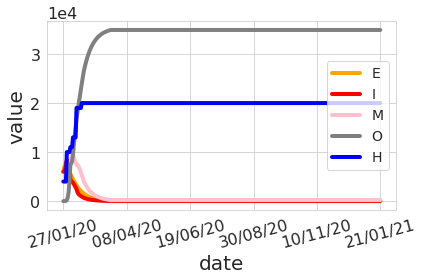

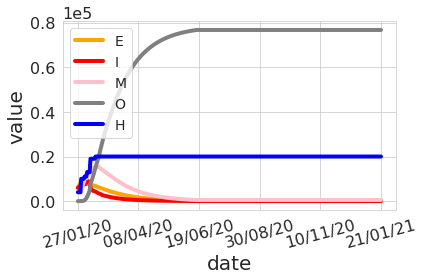

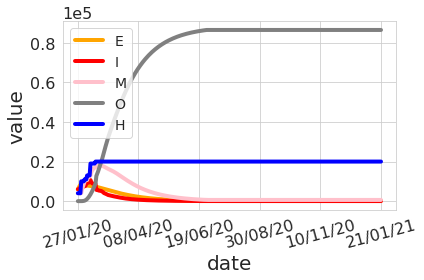

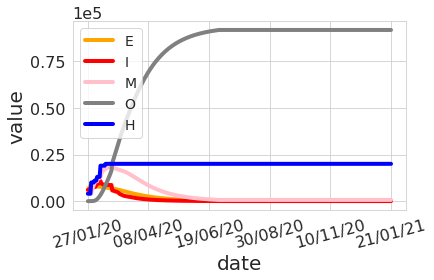

In [36]:
for k, bundle, stats in rows:    
    print(k)
    fig, ax = plot_total(bundle[0], p0_time, total_days)
    fig.savefig(f'figs/effect-of-k/{k}.pdf')

    save_bundle(bundle, p0_time, total_days, f'output/tbl/effect-of-k/{k}/')
    save_to_json(stats, f'output/tbl/effect-of-k/{k}/stats.txt')